

https://drive.google.com/file/d/18BmnoAIu7tT-Rt_6jI0mPjwC8StyVvep/view?usp=share_link

In [101]:
import nltk
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import random as rnd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import spacy 
nlp=spacy.load("en_core_web_sm")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\issar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def text_preprocessing(raw):
    # lower case
    raw = raw.lower()
    # remove numbers
    raw = re.sub(r'\d+', '', raw)
    # remove punctuation
    raw = re.sub(r'[^\w\s]', '', raw)
    # white space removal
    raw = raw.strip()
    #removing any non alphanumeric characters
    raw = re.sub('\W', ' ', raw)  
    #removing extra white spaces
    raw = re.sub('\s+', ' ', raw) 
    #removing chapter numbers and running sections
    raw = re.sub('chapter \w*', '', raw)   
    return (raw)

In [3]:
novel= open("novel.txt")
raw_text=novel.read()
T=raw_text

In [4]:
T=text_preprocessing(T)
print(T)

operation interstellar produced by greg weeks mary meehan and the online distributed proofreading team at httpwwwpgdpnet operation interstellar _by_ george o smith century publications chicago published by century publications n clark st chicago ill _printed in the united states of america_ characters and situations in this book are fictional and any similarity to actual persons or places is purely coincidental permission to use some of the refrains from the ballad the cyclotronists nightmare by arthur roberts of the state university of iowa was graciously granted and is hereby acknowledged with sincere appreciation cover by malcolm smith _copyright century publications_ transcribers note extensive research did not uncover any evidence that the us copyright on this publication was renewed  grayson walked the city street slowly he was sauntering towards the spaceport but he was in no hurry he had allowed himself plenty of time to breathe the fresh spring air to listen to the myriad of s

## Entities

In [14]:
entities=nlp(T)
entity_list= [ent for ent in entities.ents]
entity_list

[weeks,
 george o smith,
 century,
 chicago,
 century,
 clark st,
 the united states of america,
 arthur roberts,
 the state university of iowa,
 malcolm smith,
 century,
 us,
 grayson,
 greenery,
 more than a few dozen,
 a few days,
 a few weeks,
 four,
 two thousand millions of years,
 paul grayson,
 ten days,
 the bureau of astrogation,
 thirty days,
 paul grayson,
 paul,
 four years ago,
 a full hour,
 the hour,
 a full five minutes,
 more than a,
 paul,
 paul,
 paul,
 thirty,
 first,
 paul grayson,
 the hour,
 paul grayson,
 hours,
 paul,
 paul,
 paul grayson,
 paul,
 paul kissed,
 paul,
 paul,
 paul grayson,
 paul,
 forty degrees,
 paul,
 paul,
 paul,
 paul,
 paul,
 paul,
 paul grayson,
 the bureau of astrogation,
 paul,
 forty minutes,
 paul,
 nora phillips,
 paul,
 nora phillips,
 four years ago,
 nora,
 one hundred,
 paul,
 a hundred and forty,
 less than three years,
 seven light years,
 a hundred years from now,
 neoterra,
 a century and a half,
 one,
 paul,
 paul grayson,
 

## Entity Labels 

In [17]:
entity_labels=[ent.label_ for ent in entities.ents]
entity_labels

['DATE',
 'PERSON',
 'DATE',
 'GPE',
 'DATE',
 'PERSON',
 'GPE',
 'PERSON',
 'ORG',
 'PERSON',
 'DATE',
 'GPE',
 'PERSON',
 'ORG',
 'CARDINAL',
 'DATE',
 'DATE',
 'CARDINAL',
 'DATE',
 'PERSON',
 'DATE',
 'ORG',
 'DATE',
 'PERSON',
 'PERSON',
 'DATE',
 'TIME',
 'TIME',
 'TIME',
 'CARDINAL',
 'PERSON',
 'PERSON',
 'PERSON',
 'DATE',
 'ORDINAL',
 'PERSON',
 'TIME',
 'PERSON',
 'TIME',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'QUANTITY',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'ORG',
 'PERSON',
 'TIME',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'DATE',
 'PERSON',
 'CARDINAL',
 'PERSON',
 'CARDINAL',
 'DATE',
 'DATE',
 'DATE',
 'ORG',
 'DATE',
 'CARDINAL',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'CARDINAL',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'CARDINAL',
 'CARDINAL',
 'LOC',
 'PERSON',
 'CARDINAL',
 'DATE',
 'PERSON',
 'CARDINAL',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'P

In [19]:
for i in range(len(entity_list)):
    print(f"{entity_list[i]} -> {entity_labels[i]}")

weeks -> DATE
george o smith -> PERSON
century -> DATE
chicago -> GPE
century -> DATE
clark st -> PERSON
the united states of america -> GPE
arthur roberts -> PERSON
the state university of iowa -> ORG
malcolm smith -> PERSON
century -> DATE
us -> GPE
grayson -> PERSON
greenery -> ORG
more than a few dozen -> CARDINAL
a few days -> DATE
a few weeks -> DATE
four -> CARDINAL
two thousand millions of years -> DATE
paul grayson -> PERSON
ten days -> DATE
the bureau of astrogation -> ORG
thirty days -> DATE
paul grayson -> PERSON
paul -> PERSON
four years ago -> DATE
a full hour -> TIME
the hour -> TIME
a full five minutes -> TIME
more than a -> CARDINAL
paul -> PERSON
paul -> PERSON
paul -> PERSON
thirty -> DATE
first -> ORDINAL
paul grayson -> PERSON
the hour -> TIME
paul grayson -> PERSON
hours -> TIME
paul -> PERSON
paul -> PERSON
paul grayson -> PERSON
paul -> PERSON
paul kissed -> PERSON
paul -> PERSON
paul -> PERSON
paul grayson -> PERSON
paul -> PERSON
forty degrees -> QUANTITY
paul

In [49]:
def NER(text):
    entities=nlp(text)
    
    for i in entities.ents:
        print(f"{i} -> {i.label_}")
        
    pairs = [(ent.text, ent.label_) for ent in entities.ents]
    return pairs

## Function to calculate F1 score

In [50]:
def f1(text,manual_labels):
    doc=nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    true_positives = set(entities) & set(manual_labels)
    false_positives = set(entities) - set(manual_labels)
    false_negatives = set(manual_labels) - set(entities)

    precision = len(true_positives) / (len(true_positives) + len(false_positives))
    recall = len(true_positives) / (len(true_positives) + len(false_negatives))
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

# PART 1 

## Passage 1

nora phillips ill go along of course will you have one of your men keep an eye out for a tall man who should have been passing here by now hes overdue he will be tommy morgan


In [23]:
text1="nora phillips ill go along of course will you have one of your men keep an eye out for a tall man who should have been passing here by now hes overdue he will be tommy morgan"

In [42]:
manual_labels1 = [
    ("nora phillips", "PERSON"),
    ("Tommy Morgan", "PERSON"),
]


In [51]:
pairs1=NER(text1)

nora phillips -> PERSON


In [54]:
score1=f1(text1,manual_labels1)
print(score1)

0.6666666666666666


## Passage 2

gang to try the five planets of sirius again they got the zwave working after a bit of fiddling with the tuning but weve not been able to get so much as a whisper from sol to proxima centauri via zwave what started haedaecker thinking was the experiment they tried about ten years ago paul


In [25]:
text2="gang to try the five planets of sirius again they got the zwave working after a bit of fiddling with the tuning but weve not been able to get so much as a whisper from sol to proxima centauri via zwave what started haedaecker thinking was the experiment they tried about ten years ago paul"

In [40]:
manual_labels2 = [
    ("haedaecker", "PERSON"),
    ("ten years ago", "DATE"),
    ("paul", "PERSON"),
]


In [29]:
NER(text2)

five -> CARDINAL
about ten years ago -> DATE
paul -> PERSON


In [55]:
pairs2=NER(text2)

five -> CARDINAL
about ten years ago -> DATE
paul -> PERSON


In [57]:
score2=f1(text2,manual_labels2)
print(score2)

0.3333333333333333


## Passage 3

premises by the howdaille moving and storage company it is currently there in storage with the bill paid in advance for six months any more i had morton enquire about a rental at that address and he was told that miss phillips had to return home because of illness


In [27]:
text3="premises by the howdaille moving and storage company it is currently there in storage with the bill paid in advance for six months any more i had morton enquire about a rental at that address and he was told that miss phillips had to return home because of illness"

In [60]:
manual_labels3 = [
    ("Howdaille Moving and Storage Company", "ORG"),
    ("Morton", "PERSON"),
    ("Miss Phillips", "PERSON"),
    ("six months","DATE")
]


In [61]:
NER(text3)

six months -> DATE
morton -> PERSON


[('six months', 'DATE'), ('morton', 'PERSON')]

In [62]:
pairs3=NER(text3)

six months -> DATE
morton -> PERSON


In [63]:
score3=f1(text3,manual_labels3)
print(score3)

0.3333333333333333


### INFERENCE

Based on small passages the entities calculated using libraries and the entities tagged manually have 30 to 70 % accuracy . The accuracy can be improved taking a larger text 

# PART 2

## Writing a function to seperate chapters 

In [106]:
def chapter_seperate(raw_text):
    
    #splitting the chapters from the raw text
    chapters = re.split(r'CHAPTER \d+', raw_text)
    
    
    #creating an array for chapter lengths
    chapter_lengths=[len(i) for i in chapters]
    for i in range(len(chapters)):
        chapters[i]=text_preprocessing(chapters[i])
#         chapters[i]=stopwords_text(chapters[i])
    return chapters

## Writing a function to calculate tfidf vectors and similarity between chapters using those vector

In [107]:
def tfidf(chapters):
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the chapters
    tfidf_matrix = vectorizer.fit_transform(chapters)
    print(tfidf_matrix)

    # Compute cosine similarity between chapters
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Convert similarity matrix to a DataFrame for visualization
    chapter_names = [f"Chapter {i + 1}" for i in range(len(chapters))]
    similarity_df = pd.DataFrame(similarity_matrix, index=chapter_names, columns=chapter_names)

    # Visualize the similarity matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_df, annot=True, cmap="viridis", linewidths=.5)
    plt.title("Chapter Similarity Matrix")
    plt.show()


In [108]:
chapters=chapter_seperate(raw_text)


### TFIDF vector and similarity matrix

  (0, 4582)	0.10831818245110693
  (0, 4371)	0.10831818245110693
  (0, 3843)	0.03331542942332403
  (0, 1231)	0.10831818245110693
  (0, 6014)	0.0515237676995914
  (0, 5650)	0.03331542942332403
  (0, 1894)	0.03904069452934424
  (0, 5931)	0.10831818245110693
  (0, 3764)	0.03331542942332403
  (0, 1528)	0.035116702117669145
  (0, 4611)	0.07171744228438803
  (0, 1956)	0.09480993825830893
  (0, 3765)	0.08522568647718604
  (0, 5826)	0.10831818245110693
  (0, 4373)	0.10831818245110693
  (0, 8)	0.10831818245110693
  (0, 3397)	0.10831818245110693
  (0, 1284)	0.08522568647718604
  (0, 293)	0.10831818245110693
  (0, 5044)	0.10831818245110693
  (0, 6290)	0.03331542942332403
  (0, 87)	0.10831818245110693
  (0, 2655)	0.10831818245110693
  (0, 2439)	0.10831818245110693
  (0, 2434)	0.08522568647718604
  :	:
  (17, 2450)	0.030628069624141014
  (17, 3996)	0.05104678270690168
  (17, 3843)	0.08394254962094928
  (17, 5650)	0.05165695361289187
  (17, 3764)	0.012914238403222967
  (17, 6290)	0.09362822842336652


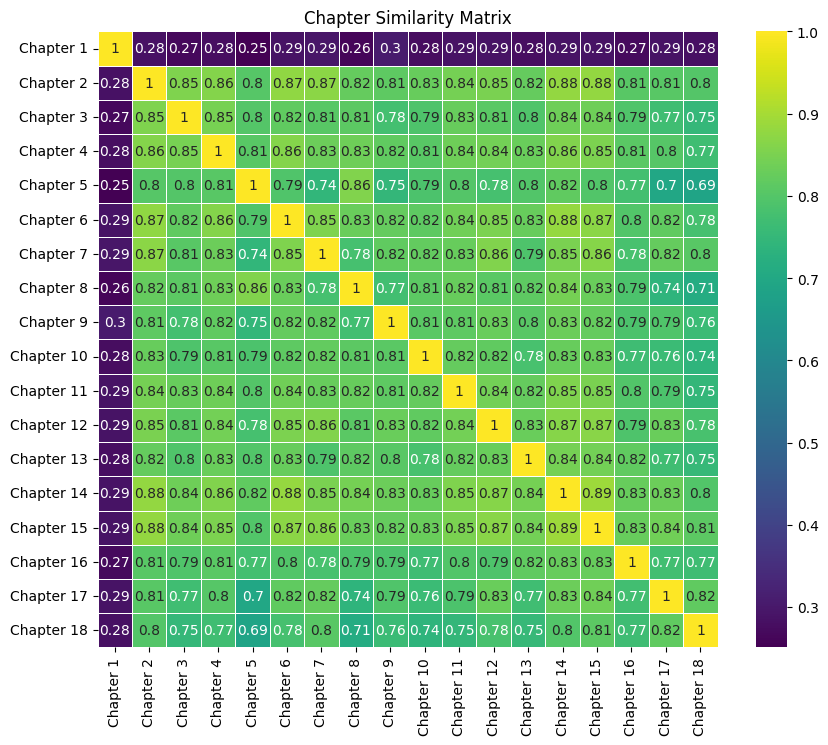

In [109]:
tfidf(chapters)